# Setup: Generate Sample Dataset

This cell creates the required folder structure (`data/raw/` and `data/processed/`) relative to the notebook, and generates the sample CSV dataset with missing values. 
This ensures the dataset is ready for cleaning functions and saves it to `data/raw/sample_data.csv`.

In [1]:
import os
import pandas as pd
import numpy as np

# Define folder paths relative to this notebook
raw_dir = 'data/raw'
processed_dir = 'data/processed'
src_dir = 'src/'

# Create folders if they don't exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(src_dir, exist_ok=True)

# Define the sample data
data = {
    'age': [34, 45, 29, 50, 38, np.nan, 41],
    'income': [55000, np.nan, 42000, 58000, np.nan, np.nan, 49000],
    'score': [0.82, 0.91, np.nan, 0.76, 0.88, 0.65, 0.79],
    'zipcode': ['90210', '10001', '60614', '94103', '73301', '12345', '94105'],
    'city': ['Beverly', 'New York', 'Chicago', 'SF', 'Austin', 'Unknown', 'San Francisco'],
    'extra_data': [np.nan, 42, np.nan, np.nan, np.nan, 5, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV in raw data folder
csv_path = os.path.join(raw_dir, 'sample_data.csv')
if not os.path.exists(csv_path):
    df.to_csv(csv_path, index=False)
    print(f'Sample dataset created and saved to {csv_path}')
else:
    print(f'File already exists at {csv_path}. Skipping CSV creation to avoid overwrite.')


File already exists at data/raw/sample_data.csv. Skipping CSV creation to avoid overwrite.


# Homework Starter — Stage 6: Data Preprocessing
Use this notebook to apply your cleaning functions and save processed data.

In [2]:
# Imports
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import missingno as msno
import os, sys
cleaning_path = Path.cwd() / "src"
sys.path.append(str(cleaning_path))
from src import cleaning

## Load Raw Dataset

In [3]:
df = pd.read_csv(csv_path)
df

,age,income,score,zipcode,city,extra_data
0,34.0,55000.0,0.82,90210,Beverly,NaN
1,45.0,NaN,0.91,10001,New York,42.0
2,29.0,42000.0,NaN,60614,Chicago,NaN
3,50.0,58000.0,0.76,94103,SF,NaN
4,38.0,NaN,0.88,73301,Austin,NaN
5,NaN,NaN,0.65,12345,Unknown,5.0
6,41.0,49000.0,0.79,94105,San Francisco,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6 non-null      float64
 1   income      4 non-null      float64
 2   score       6 non-null      float64
 3   zipcode     7 non-null      int64  
 4   city        7 non-null      object 
 5   extra_data  2 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 468.0+ bytes


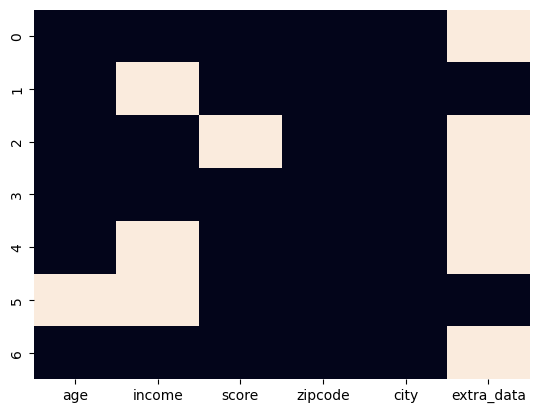

<Axes: >

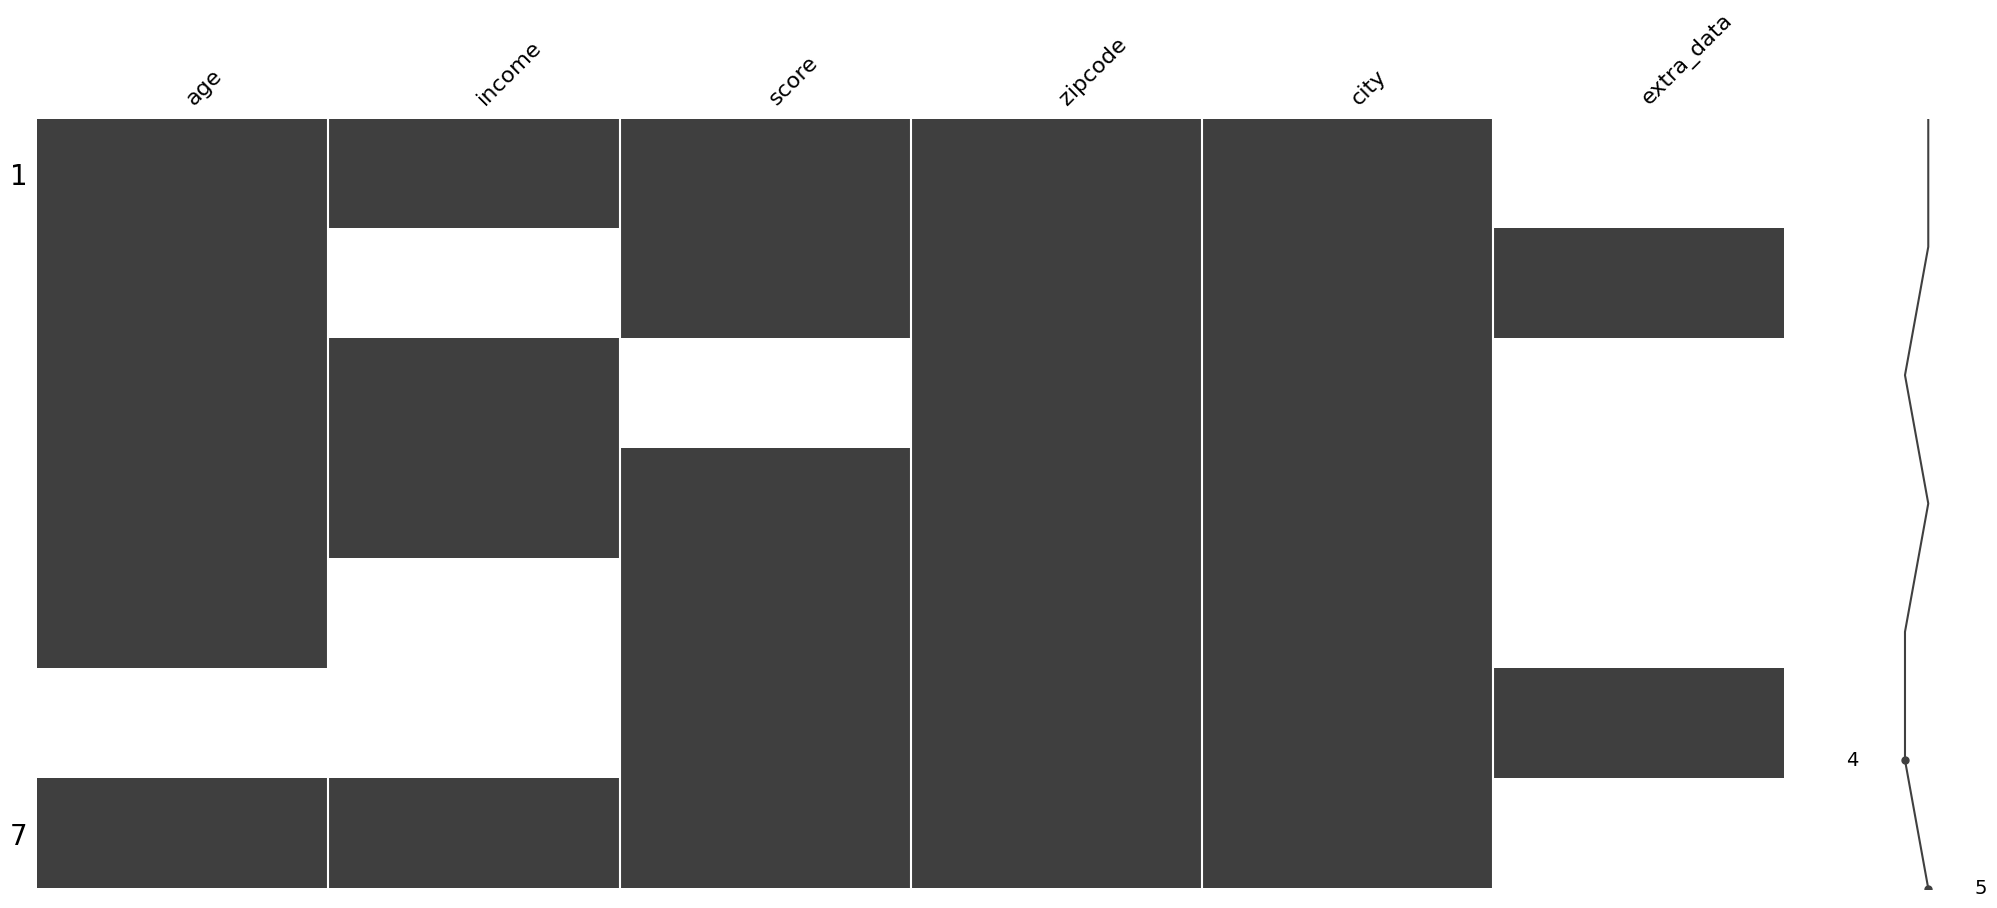

In [4]:
# Basic info and missing counts
df.info()
df.isna().sum()

# Heatmap for missing data
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# missingno visualization
msno.matrix(df)

In [5]:
# MCAR: random missing
df['MCAR_col'] = df['income'].mask(np.random.rand(len(df)) < 0.1)
# MAR: missing depends on another column
df['MAR_col'] = df['income'].mask(df['age']==38)
# MNAR: missing depends on its own value
df['MNAR_col'] = df['income'].mask(df['income']>55000)
df

,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col
0,34.0,55000.0,0.82,90210,Beverly,NaN,55000.0,55000.0,55000.0
1,45.0,NaN,0.91,10001,New York,42.0,NaN,NaN,NaN
2,29.0,42000.0,NaN,60614,Chicago,NaN,42000.0,42000.0,42000.0
3,50.0,58000.0,0.76,94103,SF,NaN,58000.0,58000.0,NaN
4,38.0,NaN,0.88,73301,Austin,NaN,NaN,NaN,NaN
5,NaN,NaN,0.65,12345,Unknown,5.0,NaN,NaN,NaN
6,41.0,49000.0,0.79,94105,San Francisco,NaN,49000.0,49000.0,49000.0


## Apply Cleaning Functions

In [6]:
df_processed = df.copy()
df_processed = cleaning.fill_missing_median(df_processed,columns=['age','income','score','extra_data'])
df_processed

,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col
0,34.0,55000.0,0.820,90210,Beverly,23.5,55000.0,55000.0,55000.0
1,45.0,52000.0,0.910,10001,New York,42.0,NaN,NaN,NaN
2,29.0,42000.0,0.805,60614,Chicago,23.5,42000.0,42000.0,42000.0
3,50.0,58000.0,0.760,94103,SF,23.5,58000.0,58000.0,NaN
4,38.0,52000.0,0.880,73301,Austin,23.5,NaN,NaN,NaN
5,39.5,52000.0,0.650,12345,Unknown,5.0,NaN,NaN,NaN
6,41.0,49000.0,0.790,94105,San Francisco,23.5,49000.0,49000.0,49000.0


In [7]:
df_processed = cleaning.drop_missing(df_processed,columns=['MCAR_col'], threshold=0.3)
df_processed

,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col
0,34.0,55000.0,0.820,90210,Beverly,23.5,55000.0,55000.0,55000.0
2,29.0,42000.0,0.805,60614,Chicago,23.5,42000.0,42000.0,42000.0
3,50.0,58000.0,0.760,94103,SF,23.5,58000.0,58000.0,NaN
6,41.0,49000.0,0.790,94105,San Francisco,23.5,49000.0,49000.0,49000.0


In [8]:
df_processed = cleaning.normalize_data(df_processed,method='minmax')
df_processed

,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col,scaled
0,34.0,55000.0,0.820,90210,Beverly,23.5,55000.0,55000.0,55000.0,0.238095
2,29.0,42000.0,0.805,60614,Chicago,23.5,42000.0,42000.0,42000.0,0.000000
3,50.0,58000.0,0.760,94103,SF,23.5,58000.0,58000.0,NaN,1.000000
6,41.0,49000.0,0.790,94105,San Francisco,23.5,49000.0,49000.0,49000.0,0.571429


In [9]:
# Inspect
df_processed.info()
df_processed.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 6
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         4 non-null      float64
 1   income      4 non-null      float64
 2   score       4 non-null      float64
 3   zipcode     4 non-null      int64  
 4   city        4 non-null      object 
 5   extra_data  4 non-null      float64
 6   MCAR_col    4 non-null      float64
 7   MAR_col     4 non-null      float64
 8   MNAR_col    3 non-null      float64
 9   scaled      4 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 352.0+ bytes


,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col,scaled
0,34.0,55000.0,0.820,90210,Beverly,23.5,55000.0,55000.0,55000.0,0.238095
2,29.0,42000.0,0.805,60614,Chicago,23.5,42000.0,42000.0,42000.0,0.000000
3,50.0,58000.0,0.760,94103,SF,23.5,58000.0,58000.0,NaN,1.000000
6,41.0,49000.0,0.790,94105,San Francisco,23.5,49000.0,49000.0,49000.0,0.571429


## Save Cleaned Dataset

In [10]:
csv_processed_path = os.path.join(processed_dir, 'sample_data_cleaned.csv')
df_processed.to_csv(csv_processed_path, index=False)

## Raw vs Processed Data

In [14]:
print("Raw Data: \n")
print(df.head(5))
print(df.info())
print("***************")
print("\nProcessed Data:")
print(df_processed.head(5))
print(df_processed.info)

Raw Data: 

    age   income  score  zipcode      city  extra_data  MCAR_col  MAR_col  \
0  34.0  55000.0   0.82    90210   Beverly         NaN   55000.0  55000.0   
1  45.0      NaN   0.91    10001  New York        42.0       NaN      NaN   
2  29.0  42000.0    NaN    60614   Chicago         NaN   42000.0  42000.0   
3  50.0  58000.0   0.76    94103        SF         NaN   58000.0  58000.0   
4  38.0      NaN   0.88    73301    Austin         NaN       NaN      NaN   

   MNAR_col  
0   55000.0  
1       NaN  
2   42000.0  
3       NaN  
4       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6 non-null      float64
 1   income      4 non-null      float64
 2   score       6 non-null      float64
 3   zipcode     7 non-null      int64  
 4   city        7 non-null      object 
 5   extra_data  2 non-null      float64
 6   MCAR_col

# Assumptions

### 1. Handling Missing Data
We fill missing numbers with the median when data are missing randomly. For time series, we fill missing values by using nearby points. If missing data isn’t critical, we may drop those rows. Any filling method changes the data’s averages and patterns.

### 2. Types of Missing Data
Missing values can be random (MCAR: safe to fill or drop), related to other data (MAR: can fill using related info), or dependent on unseen factors (MNAR: needs expert insight). Mistakes in understanding these can skew results.

### 3. Cleaning the Data
We remove impossible or out-of-range values assuming they’re errors. If a column or row has too much missing data, we drop it, assuming it’s not important. But this leads to removing some rare cases where the data is valid.

### 4. Scaling Data
StandardScaler assume data follow a normal pattern, MinMaxScaler expect minimum and maximum values to be typical.


### 5. Making It Reproducible
Cleaning.py is designed assuming the future datasets will adhere to similar dataframe structure